In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)

In [22]:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

import json
import pickle

In [3]:
df = pd.read_csv(r'src/Weekly_Pizza_Sales.csv')
df

,week_number,pizza_name,pizza_size,quantity,year,month,day,unit_price,pizza_category,festival
0,1,The Barbecue Chicken Pizza,L,18,2015,1,5,20.75,Chicken,No Festival
1,1,The Barbecue Chicken Pizza,M,15,2015,1,5,16.75,Chicken,No Festival
2,1,The Barbecue Chicken Pizza,S,5,2015,1,5,12.75,Chicken,No Festival
3,1,The Big Meat Pizza,S,21,2015,1,5,12.00,Classic,No Festival
4,1,The Brie Carre Pizza,S,3,2015,1,5,23.65,Supreme,No Festival
...,...,...,...,...,...,...,...,...,...,...
4748,53,The Thai Chicken Pizza,M,4,2016,1,4,16.75,Chicken,No Festival
4749,53,The Thai Chicken Pizza,S,4,2016,1,4,12.75,Chicken,No Festival
4750,53,The Vegetables + Vegetables Pizza,L,6,2016,1,4,20.25,Veggie,No Festival
4751,53,The Vegetables + Vegetables Pizza,M,4,2016,1,4,16.00,Veggie,No Festival


In [5]:
pizza_cat =df.groupby('pizza_category')['unit_price'].mean().sort_values(ascending = False)

pizza_cat = {cat: enc for cat, enc in zip(pizza_cat.index,[i for i in range(0,pizza_cat.shape[0])])}
pizza_cat

{'Supreme': 0, 'Chicken': 1, 'Veggie': 2, 'Classic': 3}

In [6]:
pizza_size = df.groupby('pizza_size')['unit_price'].mean().sort_values(ascending = False)
pizza_size = {size: enc for size, enc in zip(pizza_size.index,[i for i in range(0,pizza_size.shape[0])])}
pizza_size

{'XXL': 0, 'XL': 1, 'L': 2, 'M': 3, 'S': 4}

In [13]:
pizza_name =df.groupby('pizza_name')['unit_price'].mean().sort_values(ascending = False)
pizza_name = {name: enc for name, enc in zip(pizza_name.index,[i for i in range(0,pizza_name.shape[0])])}


In [11]:
festival_data = {'No Festival': 0, 'Easter Sunday': 1, 'Memorial Day': 2, 'Independence Day': 3, 'Labor Day': 4, 'Thanksgiving Day': 5}

In [12]:
encoded_data = {'pizza_category': pizza_cat, 'pizza_size': pizza_size, 'pizza_name': pizza_name, 'festival' : festival_data }
encoded_data

{'pizza_category': {'Supreme': 0, 'Chicken': 1, 'Veggie': 2, 'Classic': 3},
 'pizza_size': {'XXL': 0, 'XL': 1, 'L': 2, 'M': 3, 'S': 4},
 'pizza_name': {'The Brie Carre Pizza': 0,
  'The Greek Pizza': 1,
  'The Five Cheese Pizza': 2,
  'The Chicken Alfredo Pizza': 3,
  'The Italian Vegetables Pizza': 4,
  'The Barbecue Chicken Pizza': 5,
  'The Thai Chicken Pizza': 6,
  'The Southwest Chicken Pizza': 7,
  'The California Chicken Pizza': 8,
  'The Chicken Pesto Pizza': 9,
  'The Soppressata Pizza': 10,
  'The Spinach Supreme Pizza': 11,
  'The Italian Supreme Pizza': 12,
  'The Pepper Salami Pizza': 13,
  'The Spicy Italian Pizza': 14,
  'The Spinach Pesto Pizza': 15,
  'The Prosciutto and Arugula Pizza': 16,
  'The Calabrese Pizza': 17,
  'The Four Cheese Pizza': 18,
  'The Sicilian Pizza': 19,
  'The Italian Capocollo Pizza': 20,
  'The Classic Deluxe Pizza': 21,
  'The Napolitana Pizza': 22,
  'The Mexicana Pizza': 23,
  'The Mediterranean Pizza': 24,
  'The Spinach and Feta Pizza': 2

In [23]:
# Write the unique_value dictionary to a JSON file with proper indentation
with open(r'src/Category_Columns_Encoded_Data.json', 'w') as file:
    json.dump(encoded_data, file , indent = 4)

In [19]:
#Converting Categorical data into Numerical data
for col_name in [col for col in df.columns if df[col].dtype == 'object']:
    df[col_name] = df[col_name].map(encoded_data[col_name])
df

,week_number,pizza_name,pizza_size,quantity,year,month,day,unit_price,pizza_category,festival
0,1,5,2,18,2015,1,5,20.75,1,0
1,1,5,3,15,2015,1,5,16.75,1,0
2,1,5,4,5,2015,1,5,12.75,1,0
3,1,31,4,21,2015,1,5,12.00,3,0
4,1,0,4,3,2015,1,5,23.65,0,0
...,...,...,...,...,...,...,...,...,...,...
4748,53,6,3,4,2016,1,4,16.75,1,0
4749,53,6,4,4,2016,1,4,12.75,1,0
4750,53,26,2,6,2016,1,4,20.25,2,0
4751,53,26,3,4,2016,1,4,16.00,2,0


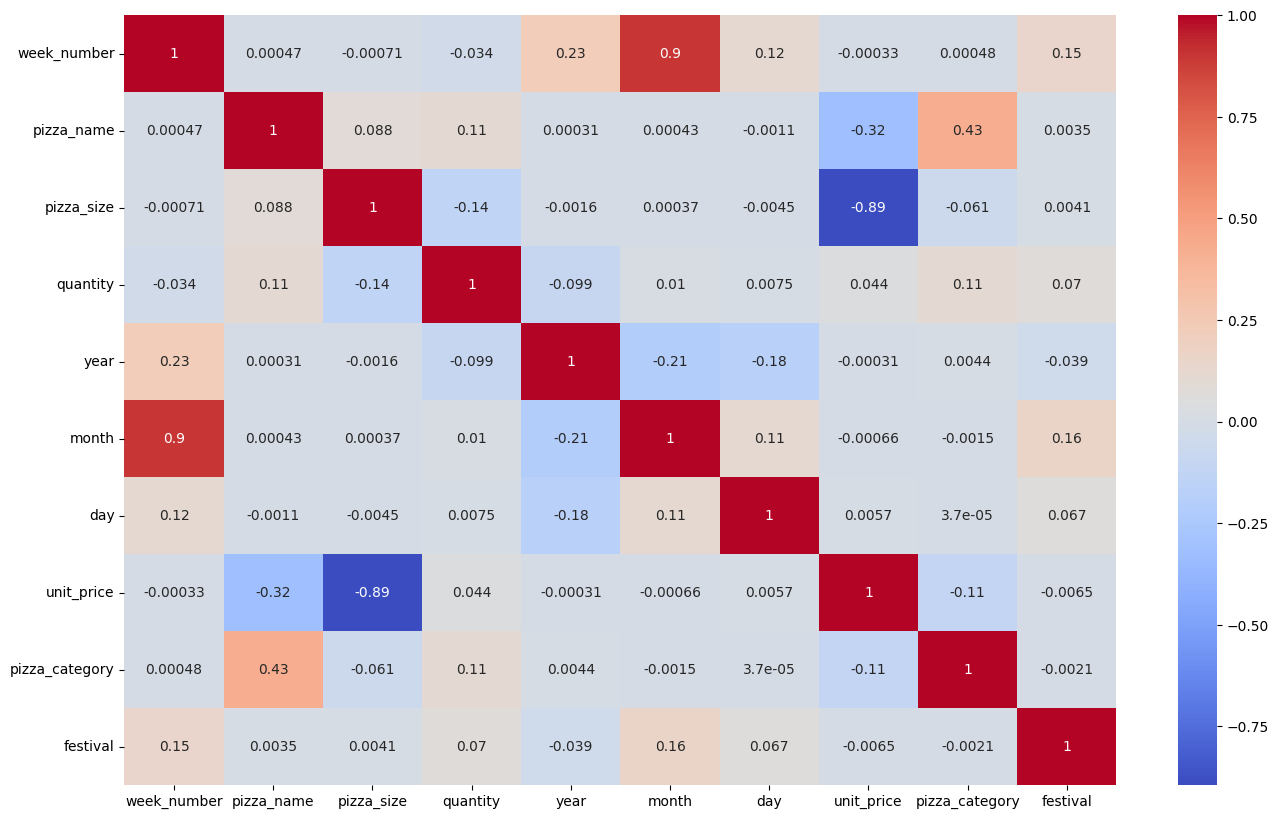

In [21]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()